# Segmentation of the customer base
The task is to analyze the purchase history of customers of a branded store of a large manufacturer of sweets.

We will segment the customers based on RFM analysis to identify the most promising segments and segments that need to be reactivated.

We'll also analyze the frequency of purchases in the branded store.

The results of the analysis and the segmentation will be used in order to develop a communication strategy for the company.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/OoC/sweets.csv', parse_dates = [2])
data.head()

,CustomerID,PurchaseID,DateTime,ProductID,Price
0,303,256332,2021-09-20 12:00:55,1265,219.0
1,303,256332,2021-09-20 12:00:55,1268,193.0
2,303,256332,2021-09-20 12:00:55,762,146.6
3,303,256332,2021-09-20 12:00:55,761,199.8
4,303,256332,2021-09-20 12:00:55,1089,2128.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691958 entries, 0 to 1691957
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   CustomerID  int64         
 1   PurchaseID  int64         
 2   DateTime    datetime64[ns]
 3   ProductID   int64         
 4   Price       float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 64.5 MB


In [102]:
print('The period of analysis: {} - {}'.format(data['DateTime'].min(), data['DateTime'].max()))

The period of analysis: 2019-10-22 08:55:56 - 2022-04-30 20:56:10


Sales data for 2.5 years are available.

The number of customers:

In [7]:
data.CustomerID.nunique()

79578

The number of purchases:

In [8]:
data.PurchaseID.nunique()

190623

## RFM analysis

We'll aggregate data by user ID and calculate Recency (the number of days since the last purchase), Frequency (the number of purchases made), MonetaryValue (the amount spent).

In [9]:
sales = pd.DataFrame(data.groupby('CustomerID').agg({'DateTime': 'max', 'PurchaseID': 'nunique', 'Price': 'sum'})).reset_index()
sales.columns = ['CustomerID', 'R', 'F', 'M']
sales

,CustomerID,R,F,M
0,303,2022-01-20 06:49:47,7,26046.94
1,1552,2021-03-03 13:22:15,1,755.62
2,9080,2020-11-09 14:34:00,1,829.00
3,14861,2022-03-05 20:37:50,6,11498.65
4,27144,2022-01-28 10:49:26,1,1274.60
...,...,...,...,...
79573,2155419,2022-04-30 17:46:21,1,1466.40
79574,2155426,2022-04-30 16:55:57,1,2604.00
79575,2155526,2022-04-30 20:32:16,1,1020.00
79576,2155527,2022-04-30 20:31:46,1,2560.00


In [10]:
today = sales.R.max() + pd.Timedelta(days = 1)
today

Timestamp('2022-05-01 20:56:10')

In [11]:
sales['R'] = (today - sales['R']).dt.days
sales

,CustomerID,R,F,M
0,303,101,7,26046.94
1,1552,424,1,755.62
2,9080,538,1,829.00
3,14861,57,6,11498.65
4,27144,93,1,1274.60
...,...,...,...,...
79573,2155419,1,1,1466.40
79574,2155426,1,1,2604.00
79575,2155526,1,1,1020.00
79576,2155527,1,1,2560.00


Let's examine the distributions of the features:

In [12]:
sales[['R', 'F', 'M']].describe()

,R,F,M
count,79578.000000,79578.000000,79578.000000
mean,363.270087,2.395423,5307.943093
std,218.242854,3.628785,9921.917650
min,1.000000,1.000000,290.600000
25%,141.000000,1.000000,1376.217500
50%,421.000000,1.000000,2504.900000
75%,522.000000,2.000000,5413.582500
max,913.000000,190.000000,506802.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

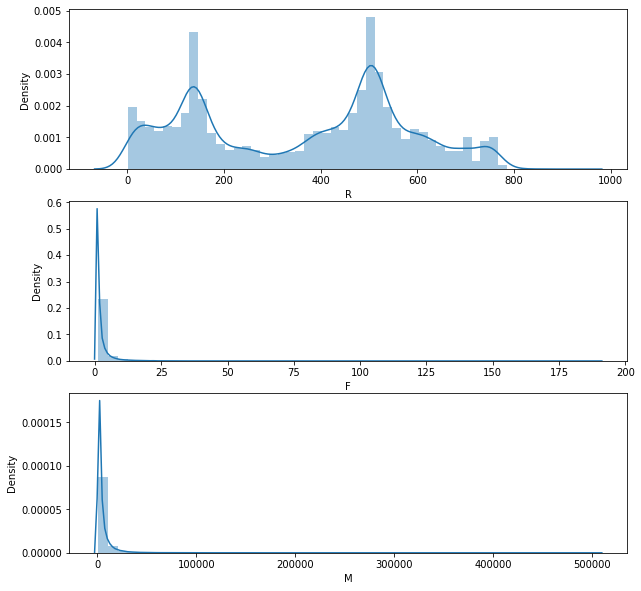

In [13]:
plt.figure(figsize=(10, 10)) 

plt.subplot(3, 1, 1); sns.distplot(sales.R);

plt.subplot(3, 1, 2); sns.distplot(sales.F);

plt.subplot(3, 1, 3); sns.distplot(sales.M);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


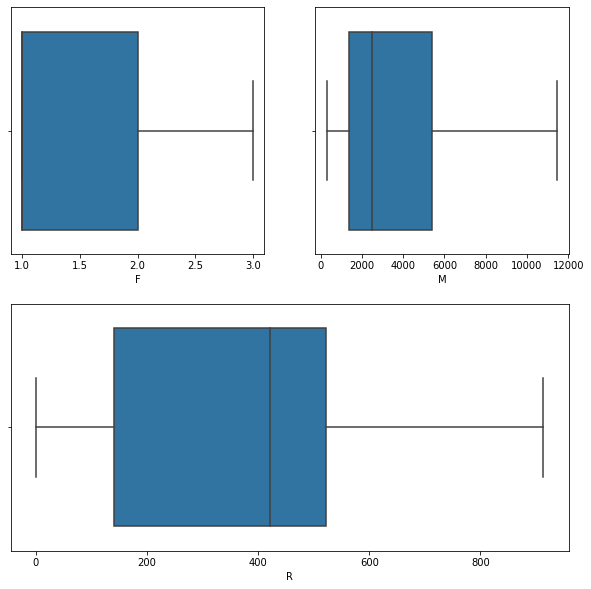

In [14]:
plt.figure(figsize=(10, 10)) 

plt.subplot(2, 1, 2); sns.boxplot('R', data = sales);

plt.subplot(2, 2, 1); sns.boxplot('F', data = sales, sym = '');

plt.subplot(2, 2, 2); sns.boxplot('M', data = sales, sym = '');

There is a large proportion of users that have not made a purchase for more than a year (average - 363 days, median - 421 days).

The graphs with the number of purchases and the amount spent are strongly skewed to the right; the "long tails" of users who have made a lot of purchases spending large amounts are visible. Perhaps these are corporate buyers who place orders on a regular basis spending relatively large amounts.

The median number of orders is 1, the amount is 2505 rubles. 
The average values, respectively: 2.4 orders and 5308 rubles (they are greatly influenced by the "long tails").

(Boxplot charts exclude "outliers": the numbers of purchases that are more than 3 and the amounts spent that are more than 12,000 rubles).

Let's find the deciles for each feature:

In [15]:
r_bins = [0]
for i in range(10, 110, 10):
  r_bins.append(np.percentile(sales.R, i))
r_bins

[0, 65.0, 130.0, 159.0, 294.0, 421.0, 489.0, 508.0, 546.0, 634.0, 913.0]

In [16]:
f_bins = [0]
for i in range(10, 110, 10):
  f_bins.append(np.percentile(sales.F, i))
f_bins

[0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 5.0, 190.0]

In [17]:
m_bins = [0]
for i in range(10, 110, 10):
  m_bins.append(np.percentile(sales.M, i))
m_bins

[0,
 953.7,
 1242.7,
 1530.6,
 1945.0,
 2504.9,
 3253.699999999999,
 4488.345,
 6672.5,
 11720.669000000014,
 506802.5]

Let's combine the values into a table:

In [18]:
deciles = pd.DataFrame([r_bins[1:], f_bins[1:], m_bins[1:]], index = ['R', 'F', 'M'], columns = list(range(10, 110, 10)))
deciles

,10,20,30,40,50,60,70,80,90,100
R,65.0,130.0,159.0,294.0,421.0,489.0,508.000,546.0,634.000,913.0
F,1.0,1.0,1.0,1.0,1.0,1.0,2.000,3.0,5.000,190.0
M,953.7,1242.7,1530.6,1945.0,2504.9,3253.7,4488.345,6672.5,11720.669,506802.5


We will assign each user an appropriate weight for each of the three parameters (the higher the value, the more valuable the user is: fewer days have passed since the last purchase, more orders have been made, a larger amount has been spent).

In [19]:
r_labels = list(range(10, 0, -1))
f_labels = [3.5, 7, 8, 9, 10]
m_labels = list(range(1, 11))

r_deciles = pd.cut(sales.R, bins = r_bins, labels = r_labels)
f_deciles = pd.cut(sales.F, bins = [0, 1, 2, 3, 5, 190], labels = f_labels)
m_deciles = pd.cut(sales.M, bins = m_bins, labels = m_labels)

rfm = sales.assign(Rd = r_deciles, Fd = f_deciles, Md = m_deciles)

In [20]:
rfm

,CustomerID,R,F,M,Rd,Fd,Md
0,303,101,7,26046.94,9,10.0,10
1,1552,424,1,755.62,5,3.5,1
2,9080,538,1,829.00,3,3.5,1
3,14861,57,6,11498.65,10,10.0,9
4,27144,93,1,1274.60,9,3.5,3
...,...,...,...,...,...,...,...
79573,2155419,1,1,1466.40,10,3.5,3
79574,2155426,1,1,2604.00,10,3.5,6
79575,2155526,1,1,1020.00,10,3.5,2
79576,2155527,1,1,2560.00,10,3.5,6


Let's check that the weights are assigned correctly:

In [21]:
rfm.groupby('Rd').R.agg(['min', 'max'])

,min,max
Rd,,
10,1,65
9,66,130
8,131,159
7,160,294
6,295,421
5,422,489
4,490,508
3,509,546
2,547,634


In [22]:
rfm.groupby('Fd').F.agg(['min', 'max'])

,min,max
Fd,,
3.5,1,1
7.0,2,2
8.0,3,3
9.0,4,5
10.0,6,190


In [23]:
rfm.groupby('Md').M.agg(['min', 'max'])

,min,max
Md,,
1,290.60,953.70
2,953.80,1242.70
3,1242.80,1530.60
4,1530.61,1945.00
5,1945.20,2504.80
6,2505.00,3253.63
7,3253.98,4488.30
8,4488.35,6672.50
9,6672.90,11719.16


Let's calculate the final rating for each user:

In [24]:
rfm['RFM_score'] = rfm[['Rd', 'Fd', 'Md']].sum(axis = 1)
rfm

,CustomerID,R,F,M,Rd,Fd,Md,RFM_score
0,303,101,7,26046.94,9,10.0,10,29.0
1,1552,424,1,755.62,5,3.5,1,9.5
2,9080,538,1,829.00,3,3.5,1,7.5
3,14861,57,6,11498.65,10,10.0,9,29.0
4,27144,93,1,1274.60,9,3.5,3,15.5
...,...,...,...,...,...,...,...,...
79573,2155419,1,1,1466.40,10,3.5,3,16.5
79574,2155426,1,1,2604.00,10,3.5,6,19.5
79575,2155526,1,1,1020.00,10,3.5,2,15.5
79576,2155527,1,1,2560.00,10,3.5,6,19.5


In [25]:
rfm.RFM_score.describe()

count    79578.000000
mean        16.344165
std          6.493974
min          5.500000
25%         11.000000
50%         15.500000
75%         21.000000
max         30.000000
Name: RFM_score, dtype: float64

The resulting rating varies from 5.5 to 30, the median is 15.5, the average is 16.35.

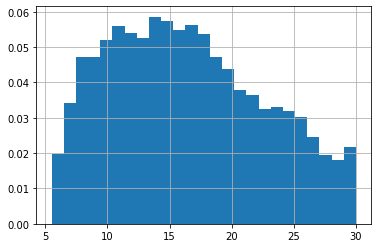

In [26]:
rfm.RFM_score.hist(density = True, bins = 25);

We'll segment users depending on the value of this rating:

In [27]:
def rfm_level(rfm_score):
  if rfm_score < 10:
    return 'Low'
  elif 10 <= rfm_score < 15:
    return 'Low Medium'
  elif 15 <= rfm_score < 20:
    return 'Medium'
  elif 20 <= rfm_score < 25:
    return 'High'
  else:
    return 'Top'

In [28]:
rfm['RFM_level'] = rfm.RFM_score.apply(rfm_level)
rfm

,CustomerID,R,F,M,Rd,Fd,Md,RFM_score,RFM_level
0,303,101,7,26046.94,9,10.0,10,29.0,Top
1,1552,424,1,755.62,5,3.5,1,9.5,Low
2,9080,538,1,829.00,3,3.5,1,7.5,Low
3,14861,57,6,11498.65,10,10.0,9,29.0,Top
4,27144,93,1,1274.60,9,3.5,3,15.5,Medium
...,...,...,...,...,...,...,...,...,...
79573,2155419,1,1,1466.40,10,3.5,3,16.5,Medium
79574,2155426,1,1,2604.00,10,3.5,6,19.5,Medium
79575,2155526,1,1,1020.00,10,3.5,2,15.5,Medium
79576,2155527,1,1,2560.00,10,3.5,6,19.5,Medium


Let's look at the average values of the indicators R, F, M by segment:

In [29]:
segments = rfm.groupby('RFM_level').agg({'R': ['mean', 'median'], 'F': ['mean', 'median'], 'M': ['mean', 'median', 'count']}).reset_index().set_axis(['RFM_level', 'R_mean', 'R_median', 'F_mean', 'F_median', 'M_mean', 'M_median', 'count'], axis = 1).sort_values('M_mean')
segments

,RFM_level,R_mean,R_median,F_mean,F_median,M_mean,M_median,count
1,Low,607.753879,599.0,1.000000,1.0,1142.294179,1134.650,15598
2,Low Medium,416.903740,470.0,1.063934,1.0,1905.217265,1633.070,20881
3,Medium,301.147263,247.0,1.480418,1.0,3740.525740,2864.000,18742
0,High,278.508292,248.0,2.899267,2.0,7181.035423,5458.000,12965
4,Top,128.882812,106.0,7.678546,6.0,17695.583870,12630.705,11392


We have identified 5 user segments based on the results of the RFM analysis. This simple segmentation can be used as a baseline for comparison with the following more complex customer segmentation options.

## Analysis of the frequency of purchases

Let's group the purchase data by users and dates, specify the sequential number of each purchase for each unique user and calculate the intervals between purchases:

In [30]:
fsales = pd.DataFrame(data.groupby(['CustomerID', 'DateTime']).agg({'Price': 'sum'})).reset_index()
fsales.columns = ['CustomerID', 'Date', 'Sum']
fsales

,CustomerID,Date,Sum
0,303,2021-09-20 12:00:55,3026.40
1,303,2021-10-18 08:47:41,3056.40
2,303,2021-11-22 13:17:54,2875.39
3,303,2021-12-07 14:52:56,2656.99
4,303,2021-12-27 08:08:56,2789.23
...,...,...,...
190618,2155419,2022-04-30 17:46:21,1466.40
190619,2155426,2022-04-30 16:55:57,2604.00
190620,2155526,2022-04-30 20:32:16,1020.00
190621,2155527,2022-04-30 20:31:46,2560.00


In [31]:
fsales['Num_order'] = fsales.groupby('CustomerID').cumcount() + 1
fsales

,CustomerID,Date,Sum,Num_order
0,303,2021-09-20 12:00:55,3026.40,1
1,303,2021-10-18 08:47:41,3056.40,2
2,303,2021-11-22 13:17:54,2875.39,3
3,303,2021-12-07 14:52:56,2656.99,4
4,303,2021-12-27 08:08:56,2789.23,5
...,...,...,...,...
190618,2155419,2022-04-30 17:46:21,1466.40,1
190619,2155426,2022-04-30 16:55:57,2604.00,1
190620,2155526,2022-04-30 20:32:16,1020.00,1
190621,2155527,2022-04-30 20:31:46,2560.00,1


In [32]:
fsales['lag1'] = fsales.groupby('CustomerID').Date.shift(1)
fsales

,CustomerID,Date,Sum,Num_order,lag1
0,303,2021-09-20 12:00:55,3026.40,1,NaT
1,303,2021-10-18 08:47:41,3056.40,2,2021-09-20 12:00:55
2,303,2021-11-22 13:17:54,2875.39,3,2021-10-18 08:47:41
3,303,2021-12-07 14:52:56,2656.99,4,2021-11-22 13:17:54
4,303,2021-12-27 08:08:56,2789.23,5,2021-12-07 14:52:56
...,...,...,...,...,...
190618,2155419,2022-04-30 17:46:21,1466.40,1,NaT
190619,2155426,2022-04-30 16:55:57,2604.00,1,NaT
190620,2155526,2022-04-30 20:32:16,1020.00,1,NaT
190621,2155527,2022-04-30 20:31:46,2560.00,1,NaT


In [33]:
fsales['interval'] = (fsales['Date'] - fsales['lag1']).dt.days
fsales

,CustomerID,Date,Sum,Num_order,lag1,interval
0,303,2021-09-20 12:00:55,3026.40,1,NaT,NaN
1,303,2021-10-18 08:47:41,3056.40,2,2021-09-20 12:00:55,27.0
2,303,2021-11-22 13:17:54,2875.39,3,2021-10-18 08:47:41,35.0
3,303,2021-12-07 14:52:56,2656.99,4,2021-11-22 13:17:54,15.0
4,303,2021-12-27 08:08:56,2789.23,5,2021-12-07 14:52:56,19.0
...,...,...,...,...,...,...
190618,2155419,2022-04-30 17:46:21,1466.40,1,NaT,NaN
190619,2155426,2022-04-30 16:55:57,2604.00,1,NaT,NaN
190620,2155526,2022-04-30 20:32:16,1020.00,1,NaT,NaN
190621,2155527,2022-04-30 20:31:46,2560.00,1,NaT,NaN


Let's inspect the distribution of time between the first and second purchase:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


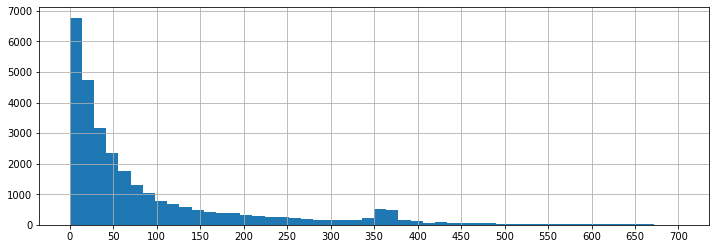

In [34]:
fsales[fsales.interval != 0][fsales.Num_order == 2].interval.hist(bins = 50, range = (0, 700), figsize = (12, 4));
plt.xticks(np.arange(0, 701, 50));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


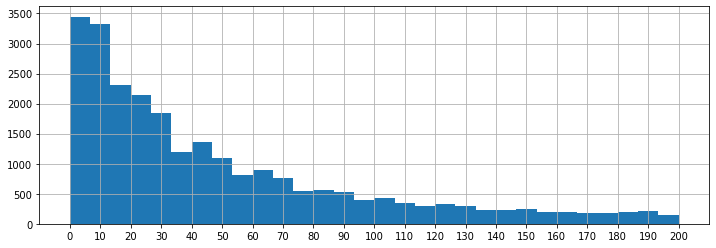

In [35]:
fsales[fsales.interval != 0][fsales.Num_order == 2].interval.hist(bins = 30, range = (0, 200), figsize = (12, 4));
plt.xticks(np.arange(0, 201, 10));

The interval between the first and second purchase can be a year or more, but over time the probability of making a repeat purchase decreases significantly.

There is also a noticeable spike in the area of 1 year; perhaps these are the cases when sweets are bought for some holiday, for example, for New Year holidays.

There is also a large number of cases when the interval between the first and second orders is less than one day (several hours or even several minutes). It is worth clarifying what this may happen due to.

In [36]:
fsales[fsales.Num_order == 2].interval.value_counts().head(10)

0.0     1757
1.0      611
5.0      598
7.0      581
6.0      580
2.0      566
4.0      558
3.0      533
8.0      491
14.0     490
Name: interval, dtype: int64

In [37]:
fsales[(fsales.Num_order == 2) & (fsales.interval == 0)]

,CustomerID,Date,Sum,Num_order,lag1,interval
76,34660,2021-02-11 18:23:10,2887.92,2,2021-02-11 18:07:05,0.0
134,38038,2021-12-21 18:48:13,11025.00,2,2021-12-21 13:24:38,0.0
163,40883,2020-12-22 09:39:39,1123.00,2,2020-12-22 08:57:43,0.0
195,43280,2020-11-15 18:22:41,1504.00,2,2020-11-15 17:41:09,0.0
233,44920,2020-11-28 20:19:49,2101.00,2,2020-11-28 19:58:15,0.0
...,...,...,...,...,...,...
190242,2128804,2022-04-20 12:26:56,2954.10,2,2022-04-20 12:09:17,0.0
190278,2129420,2022-04-21 11:01:59,1906.00,2,2022-04-21 10:28:55,0.0
190328,2130162,2022-04-22 15:01:34,1866.00,2,2022-04-22 13:55:06,0.0
190581,2154659,2022-04-30 08:53:39,4354.00,2,2022-04-29 18:12:45,0.0


In [38]:
fsales[(fsales.Num_order == 2) & (fsales.interval != 0)].interval.describe()

count    29261.000000
mean        91.162298
std        118.984220
min          1.000000
25%         15.000000
50%         41.000000
75%        112.000000
max        767.000000
Name: interval, dtype: float64

The average interval between the first and second purchase is 91 days, and the median is 41 days. A very large spread of this indicator is noticeable (standard deviation is 119 days).

For 75% of customers, the interval between the first and second purchase does not exceed 112 days.

Let's calculate the average interval between two purchases for all users who have made more than 2 purchases:

In [39]:
purch = fsales.groupby('CustomerID').agg({'Date': 'nunique', 'interval': 'sum'}).reset_index()
purch.columns = ['CustomerID', 'Num', 'Period']
purch = purch[purch['Period'] != 0]
purch

,CustomerID,Num,Period
0,303,7,119.0
3,14861,6,259.0
14,29526,13,390.0
15,29680,5,264.0
18,30600,2,51.0
...,...,...,...
79326,2130596,2,5.0
79334,2130701,2,2.0
79338,2130801,2,5.0
79377,2151813,2,3.0


In [40]:
purch['Avg_interval'] = purch['Period'] / (purch['Num'] - 1)
purch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,Num,Period,Avg_interval
0,303,7,119.0,19.833333
3,14861,6,259.0,51.800000
14,29526,13,390.0,32.500000
15,29680,5,264.0,66.000000
18,30600,2,51.0,51.000000
...,...,...,...,...
79326,2130596,2,5.0,5.000000
79334,2130701,2,2.0,2.000000
79338,2130801,2,5.0,5.000000
79377,2151813,2,3.0,3.000000


In [41]:
purch['Avg_interval'].describe()

count    30123.000000
mean        97.404242
std        107.063214
min          0.166667
25%         27.857143
50%         59.000000
75%        123.333333
max        767.000000
Name: Avg_interval, dtype: float64

The average interval between two purchases is more than 97 days, and the median is 59 days.

(The difference is explained by the "long tail" of intervals, which are much longer than usual. For example, as we have seen above, there are users who make purchases once a year, before the holidays).

In [42]:
purch[purch.Num >= 3].Avg_interval.describe()

count    18229.000000
mean        76.025398
std         62.093402
min          0.166667
25%         30.666667
50%         56.800000
75%        103.500000
max        386.000000
Name: Avg_interval, dtype: float64

If you look at the distribution of intervals among the users with 3+ purchases, the spread is much less (the standard deviation is 62 days, instead of 107).

For 75% of customers, the interval between two purchases does not exceed 103 days.

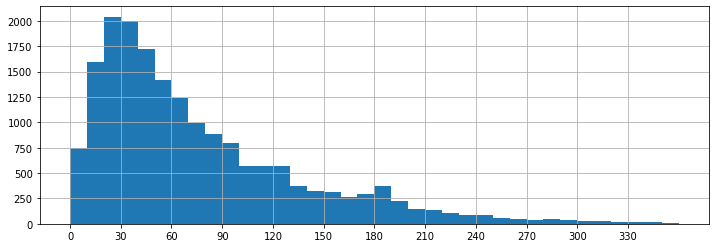

In [43]:
purch[purch.Num >= 3].Avg_interval.hist(bins = 36, range = (0, 360), figsize = (12, 4))
plt.xticks(np.arange(0, 360, 30));

Let's create a sales funnel based on the number of purchases made by customers and calculate the conversion rate at each level of this funnel:

In [44]:
TOTAL = fsales.CustomerID.nunique()
TOTAL

79578

In [45]:
fr = pd.DataFrame(fsales.groupby('Num_order').CustomerID.count().reset_index())
fr

,Num_order,CustomerID
0,1,79578
1,2,31018
2,3,18355
3,4,12496
4,5,8959
...,...,...
185,186,1
186,187,1
187,188,1
188,189,1


In [46]:
fr['%'] = fr['CustomerID'] / TOTAL * 100
fr

,Num_order,CustomerID,%
0,1,79578,100.000000
1,2,31018,38.978110
2,3,18355,23.065420
3,4,12496,15.702832
4,5,8959,11.258137
...,...,...,...
185,186,1,0.001257
186,187,1,0.001257
187,188,1,0.001257
188,189,1,0.001257


In [47]:
fr['lag1'] = fr.CustomerID.shift(1)
fr['CR'] = fr.CustomerID / fr.lag1 * 100
fr

,Num_order,CustomerID,%,lag1,CR
0,1,79578,100.000000,NaN,NaN
1,2,31018,38.978110,79578.0,38.978110
2,3,18355,23.065420,31018.0,59.175318
3,4,12496,15.702832,18355.0,68.079542
4,5,8959,11.258137,12496.0,71.694942
...,...,...,...,...,...
185,186,1,0.001257,1.0,100.000000
186,187,1,0.001257,1.0,100.000000
187,188,1,0.001257,1.0,100.000000
188,189,1,0.001257,1.0,100.000000


We will also calculate the number of unique customers and the cumulative total amount at each level of the funnel:

In [48]:
purch_count = fsales.groupby('CustomerID').Date.nunique().reset_index()

In [49]:
purch_count.columns = ['CustomerID', 'Purch_count']
purch_count

,CustomerID,Purch_count
0,303,7
1,1552,1
2,9080,1
3,14861,6
4,27144,1
...,...,...
79573,2155419,1
79574,2155426,1
79575,2155526,1
79576,2155527,1


In [50]:
num_purch = purch_count.groupby('Purch_count').CustomerID.nunique().reset_index()
num_purch.columns = ['Num_order', 'Unique_customers']
num_purch

,Num_order,Unique_customers
0,1,48560
1,2,12663
2,3,5859
3,4,3537
4,5,2231
...,...,...
70,95,1
71,97,1
72,101,1
73,166,1


In [51]:
fr = fr.merge(num_purch, on = 'Num_order')
fr

,Num_order,CustomerID,%,lag1,CR,Unique_customers
0,1,79578,100.000000,NaN,NaN,48560
1,2,31018,38.978110,79578.0,38.978110,12663
2,3,18355,23.065420,31018.0,59.175318,5859
3,4,12496,15.702832,18355.0,68.079542,3537
4,5,8959,11.258137,12496.0,71.694942,2231
...,...,...,...,...,...,...
70,95,5,0.006283,5.0,100.000000,1
71,97,4,0.005027,4.0,100.000000,1
72,101,3,0.003770,3.0,100.000000,1
73,166,2,0.002513,2.0,100.000000,1


In [52]:
fr['cumsum'] = fr['Unique_customers'].cumsum()
fr

,Num_order,CustomerID,%,lag1,CR,Unique_customers,cumsum
0,1,79578,100.000000,NaN,NaN,48560,48560
1,2,31018,38.978110,79578.0,38.978110,12663,61223
2,3,18355,23.065420,31018.0,59.175318,5859,67082
3,4,12496,15.702832,18355.0,68.079542,3537,70619
4,5,8959,11.258137,12496.0,71.694942,2231,72850
...,...,...,...,...,...,...,...
70,95,5,0.006283,5.0,100.000000,1,79574
71,97,4,0.005027,4.0,100.000000,1,79575
72,101,3,0.003770,3.0,100.000000,1,79576
73,166,2,0.002513,2.0,100.000000,1,79577


In [53]:
fr['cum_%'] = fr['cumsum'] / TOTAL * 100
fr

,Num_order,CustomerID,%,lag1,CR,Unique_customers,cumsum,cum_%
0,1,79578,100.000000,NaN,NaN,48560,48560,61.021890
1,2,31018,38.978110,79578.0,38.978110,12663,61223,76.934580
2,3,18355,23.065420,31018.0,59.175318,5859,67082,84.297168
3,4,12496,15.702832,18355.0,68.079542,3537,70619,88.741863
4,5,8959,11.258137,12496.0,71.694942,2231,72850,91.545402
...,...,...,...,...,...,...,...,...
70,95,5,0.006283,5.0,100.000000,1,79574,99.994973
71,97,4,0.005027,4.0,100.000000,1,79575,99.996230
72,101,3,0.003770,3.0,100.000000,1,79576,99.997487
73,166,2,0.002513,2.0,100.000000,1,79577,99.998743


In [54]:
fr = fr.drop(['lag1', 'cumsum'], axis = 1)
fr.columns = ['Num_order', 'Customers', 'Customers_%', 'CR_%', 'Unique_customers', 'Customers_cum_%']
fr.head(10)

,Num_order,Customers,Customers_%,CR_%,Unique_customers,Customers_cum_%
0,1,79578,100.000000,NaN,48560,61.021890
1,2,31018,38.978110,38.978110,12663,76.934580
2,3,18355,23.065420,59.175318,5859,84.297168
3,4,12496,15.702832,68.079542,3537,88.741863
4,5,8959,11.258137,71.694942,2231,91.545402
5,6,6728,8.454598,75.097667,1512,93.445425
6,7,5216,6.554575,77.526754,1084,94.807610
7,8,4132,5.192390,79.217791,819,95.836789
8,9,3313,4.163211,80.179090,588,96.575687
9,10,2725,3.424313,82.251736,450,97.141170


* 61% of the customers have made only one purchase, 77% - no more than two, 84% - no more than three.

* Only 11% of customers have made 5+ purchases.

* Almost 39% of new customers have been converted into a second purchase. 
 
* Of those who have made a second purchase, more than 59% have made a third. The conversion rate from the third into the fourth purchase is 68%. After that, the conversion rate slows down.





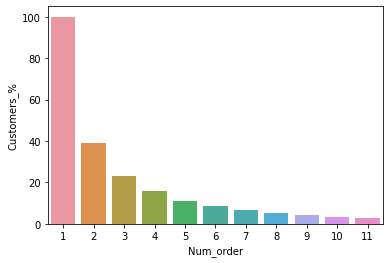

In [55]:
sns.barplot(x = 'Num_order', y = 'Customers_%', data = fr.iloc[:11]);

## Clustering (K-Means)

We will use an average check instead of the total amount of purchases for each user.

In [56]:
sales['aM'] = sales['M'] / sales['F']

We'll exclude users who have made only one purchase, and segment only those customers who have made 2+ purchases.

In [57]:
sales = sales.drop(sales[sales.F == 1].index).drop('M', axis = 1)
sales.describe()

,CustomerID,R,F,aM
count,3.101800e+04,31018.000000,31018.000000,31018.000000
mean,1.084309e+06,297.123896,4.580018,2235.076589
std,4.319438e+05,204.499335,5.095370,2793.437336
min,3.030000e+02,1.000000,2.000000,502.000000
25%,9.126355e+05,124.000000,2.000000,1350.537500
50%,9.909705e+05,271.000000,3.000000,1757.563000
75%,1.257903e+06,491.000000,5.000000,2424.063750
max,2.155160e+06,783.000000,190.000000,206392.000000


We will pre-process the data for the correct performance of the K-Means algorithm:

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [59]:
sales_log = np.log(sales.set_index('CustomerID').rename_axis(None))
sales_log

,R,F,aM
303,4.615121,1.945910,8.221745
14861,4.043051,1.791759,7.558225
29526,4.615121,2.564949,7.484815
29680,5.575949,1.609438,7.370804
30600,4.836282,0.693147,7.676161
...,...,...,...
2130801,0.693147,0.693147,6.950815
2151813,1.098612,0.693147,7.130499
2151826,1.098612,0.693147,7.155396
2154659,0.000000,0.693147,7.992269


In [60]:
scaler = StandardScaler()
scaler.fit(sales_log)

sales_norm = scaler.transform(sales_log)

In [61]:
sales_km = pd.DataFrame(sales_norm, index = sales_log.index, columns = sales_log.columns)
sales_km

,R,F,aM
303,-0.525756,1.078419,1.328073
14861,-1.000166,0.837929,0.052521
29526,-0.525756,2.044180,-0.088603
29680,0.271048,0.553490,-0.307779
30600,-0.342349,-0.876012,0.279240
...,...,...,...
2130801,-3.778201,-0.876012,-1.115166
2151813,-3.441953,-0.876012,-0.769742
2151826,-3.441953,-0.876012,-0.721879
2154659,-4.353019,-0.876012,0.886927


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

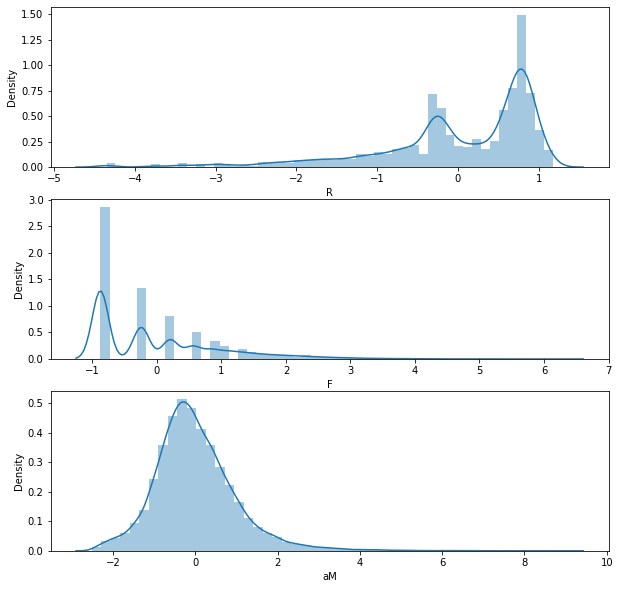

In [62]:
plt.figure(figsize=(10, 10)) 

plt.subplot(3, 1, 1); sns.distplot(sales_km.R);

plt.subplot(3, 1, 2); sns.distplot(sales_km.F);

plt.subplot(3, 1, 3); sns.distplot(sales_km.aM);

Let's choose the optimal number of clusters:

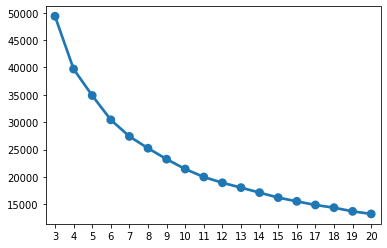

In [63]:
sse = {}

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(sales_km)
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys())[2:], y=list(sse.values())[2:])
plt.show()

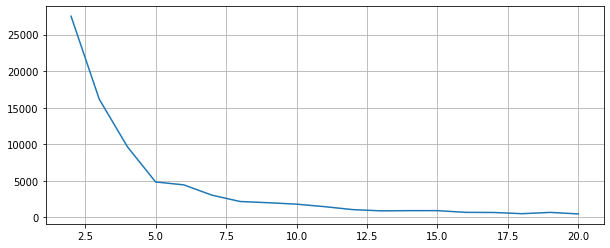

In [64]:
sse_df = pd.DataFrame.from_dict(data = sse, orient = 'index')
sse_df.columns = ['sse']
sse_df['lag1'] = sse_df.sse.shift(1)
sse_df['cummin'] = sse_df['lag1'] - sse_df['sse']
sse_df['%'] = sse_df['cummin'] / sse_df['lag1'] * 100
sse_df['cummin'].plot(figsize = (10, 4), grid = True);

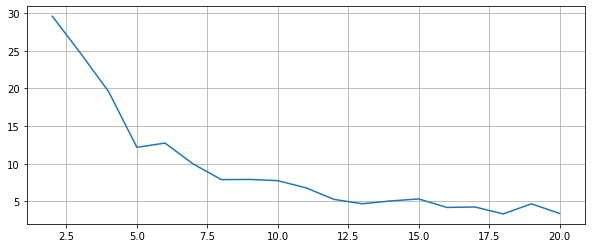

In [65]:
sse_df['%'].plot(figsize = (10, 4), grid = True);

In [66]:
sse_df

,sse,lag1,cummin,%
1,93054.000000,NaN,NaN,NaN
2,65533.840410,93054.000000,27520.159590,29.574397
3,49365.377213,65533.840410,16168.463197,24.671930
4,39710.715983,49365.377213,9654.661231,19.557556
5,34871.292720,39710.715983,4839.423263,12.186694
6,30427.450597,34871.292720,4443.842123,12.743554
7,27395.180083,30427.450597,3032.270513,9.965575
8,25231.693575,27395.180083,2163.486508,7.897325
9,23233.143535,25231.693575,1998.550040,7.920792
10,21430.641361,23233.143535,1802.502174,7.758322


We'll choose 7 clusters.

In [90]:
km7 = KMeans(n_clusters=7, random_state=123)

km7.fit(sales_km)

km_7 = sales.assign(segment = km7.labels_)

In [91]:
km_7

,CustomerID,R,F,aM,segment
0,303,101,7,3720.991429,0
3,14861,57,6,1916.441667,0
14,29526,101,13,1780.795385,0
15,29680,264,5,1588.910000,1
18,30600,126,2,2156.325000,6
...,...,...,...,...,...
79338,2130801,2,2,1044.000000,5
79377,2151813,3,2,1249.500000,5
79379,2151826,3,2,1281.000000,5
79537,2154659,1,2,2958.000000,5


In [101]:
segments7 = km_7[['R', 'F', 'aM', 'segment']].groupby(['segment'])\
      .agg({'R': [lambda x: np.percentile(x, 10), 'median', lambda x: np.percentile(x, 90)], \
            'F': [lambda x: np.percentile(x, 10), 'median', lambda x: np.percentile(x, 90)], \
            'aM': [lambda x: np.percentile(x, 10), 'median', lambda x: np.percentile(x, 90), 'count']})\
            .astype('int').rename_axis(None)
segments7.columns = ['R_10%', 'R_50%', 'R_90%', 'F_10%', 'F_50%', 'F_90%', 'aM_10%', 'aM_50%', 'aM_90%', 'count']
segments7

,R_10%,R_50%,R_90%,F_10%,F_50%,F_90%,aM_10%,aM_50%,aM_90%,count
0,17,69,188,7,13,25,1293,1923,3049,2817
1,137,374,523,4,6,9,1153,1587,2285,5850
2,306,490,608,2,2,3,1581,2025,3061,6053
3,61,149,504,2,2,5,3835,5095,11170,2334
4,164,488,636,2,2,3,738,1152,1428,6594
5,2,11,24,2,4,9,1219,2005,3484,1884
6,44,124,163,2,3,4,1429,2150,3134,5486


Segment 0: loyal customers who have made the most purchases.

Segment 1: pre-churned loyal customers that we need to try to stimulate for the next purchase.

Segment 2: churned customers.

Segment 3: customers with a high check; probably corporate buyers.

Segment 4: the least promising segment for the company (low check, few purchases, haven't bought for a long time).

Segment 5: recent buyers.

Segment 6: candidates for loyal customers who need to be stimulated for the next purchase.




Let's visualize the segments:

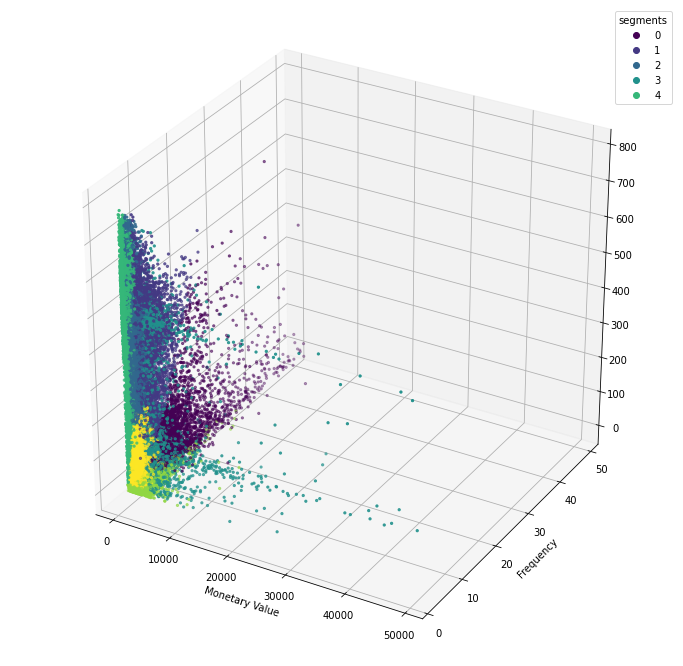

In [93]:
km_7lim = km_7[(km_7.F < 50) & (km_7.aM < 50000)]

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d') 
scatter = ax.scatter(km_7lim.aM, km_7lim.F, km_7lim.R, \
           c = km_7lim.segment, s = 5)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = [0, 1, 2, 3, 4],
           title="segments")
plt.xlabel('Monetary Value')
plt.ylabel('Frequency');

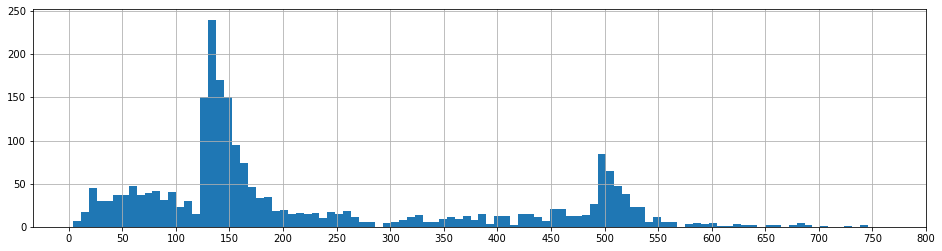

In [94]:
km_7[km_7.segment == 3].R.hist(bins = 100, figsize = (16, 4))
plt.xticks(np.arange(0, 850, step=50));

Segment 3 looks quite interesting on the graph: there are two obvious spikes in Recency (around 120-160 days and around 480-530 days), which correspond to December 2021 and December 2020 and are obviously explained by the purchases of sweets for the New Year holidays (possibly as gifts for children).

Let's compare the clusters by each feature:

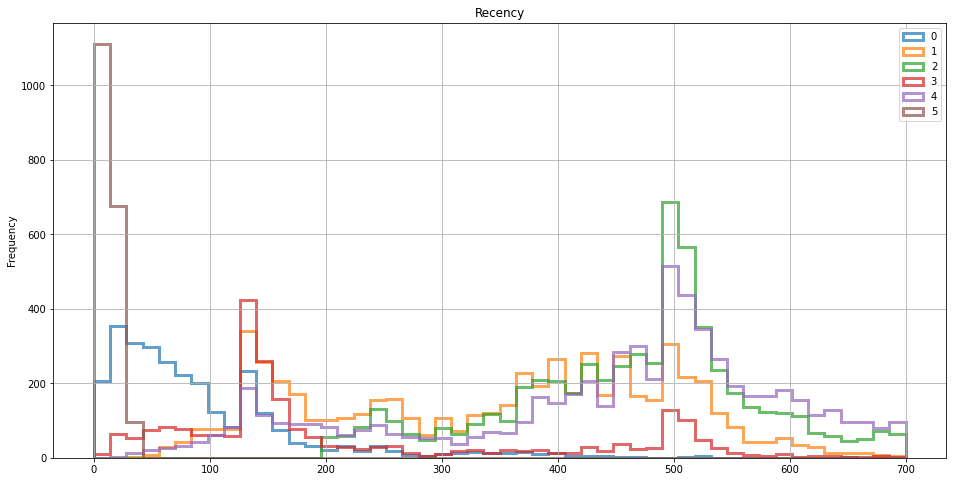

In [95]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
for i in list(range(0, 6)):
  km_7[km_7.segment == i].plot(kind = 'hist', y = 'R', histtype = 'step', range = (0, 700), bins = 50, linewidth = 3, alpha = 0.7, label = i, ax = ax, grid = True, legend = True)
plt.title('Recency');

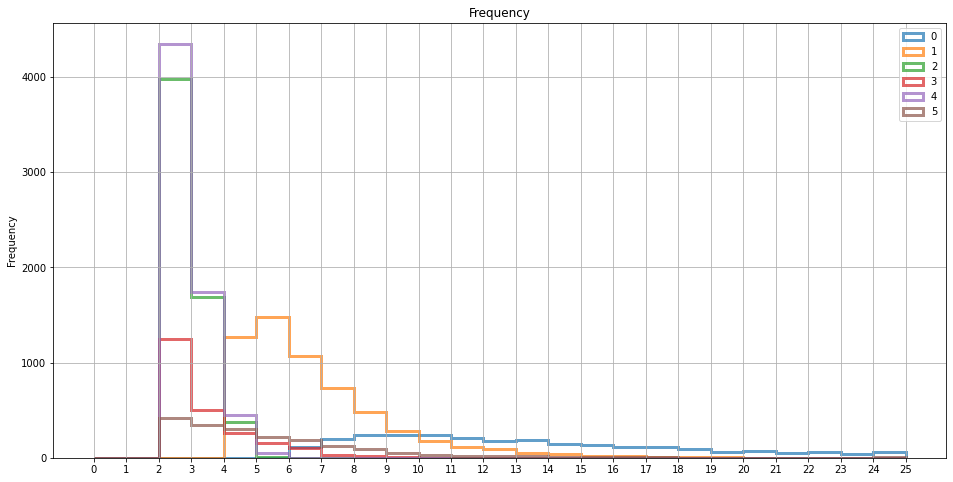

In [96]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
for i in list(range(0, 6)):
  km_7[km_7.segment == i].plot(kind = 'hist', y = 'F', histtype = 'step', range = (0, 25), bins = 25, linewidth = 3, alpha = 0.7, label = i, ax = ax, grid = True, legend = True)
plt.title('Frequency')
plt.xticks(np.arange(0, 26, 1));

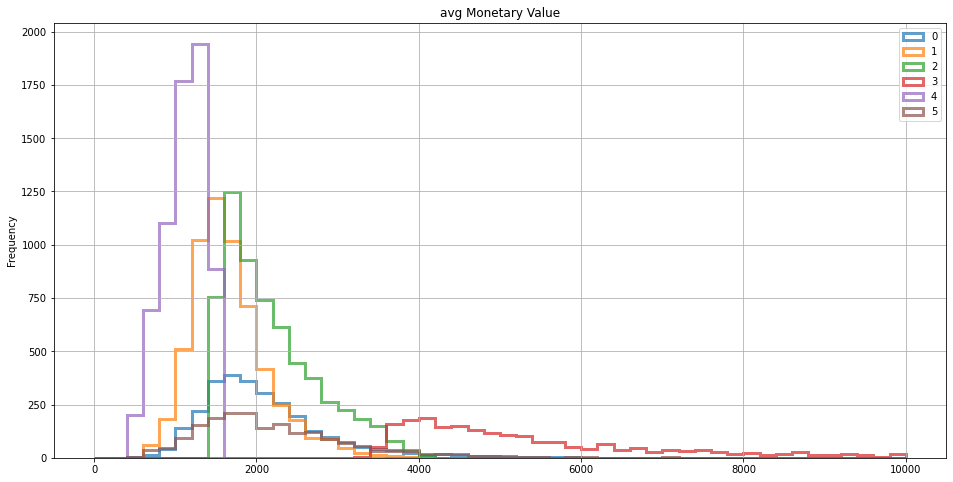

In [97]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
for i in list(range(0, 6)):
  km_7[km_7.segment == i].plot(kind = 'hist', y = 'aM', histtype = 'step', range = (0, 10000), bins = 50, linewidth = 3, alpha = 0.7, label = i, ax = ax, grid = True, legend = True)
plt.title('avg Monetary Value');

As we can see, the obtained clusters are quite clear and reasonable to be used as a base for developing a communication strategy of the company.

The company should definitely pay special attention to the clusters 1, 3, 6.